In [145]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
df = pd.read_csv("Credit_card.csv")
df

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2


In [146]:
df["Annual_income"].value_counts()

Annual_income
135000.0    170
112500.0    144
180000.0    137
157500.0    125
225000.0    119
           ... 
119700.0      1
69372.0       1
37800.0       1
333000.0      1
69750.0       1
Name: count, Length: 115, dtype: int64

In [147]:
gender_map = {"M": 1, "F": 2}
df["GENDER"] = df["GENDER"].map(gender_map)
car_map = {"Y": 1, "N": 2}
df["Car_Owner"] = df["Car_Owner"].map(car_map)
prop_map = {"Y": 1, "N": 2}
df["Propert_Owner"] = df["Propert_Owner"].map(prop_map)
mar_map = {"Married": 1, "Single / not married": 2, "Civil marriage": 3, "Separated": 4, "Widow": 5}
df["Marital_status"] = df["Marital_status"].map(mar_map)
typ_map = {"Working": 1, "Commercial associate": 2, "Pensioner": 3, "State servant": 4}
df["Type_Income"] = df["Type_Income"].map(typ_map)
ed_map = {"Secondary / secondary special": 1, "Higher education": 2, "Incomplete higher": 3, "Lower secondary": 4, "Academic degree": 5}
df["EDUCATION"] = df["EDUCATION"].map(ed_map)
hous_map = {"House / apartment": 1, "With parents": 2, "Municipal apartment": 3, "Rented apartment": 4, "Office apartment": 5, "Co-op apartment": 6}
df["Housing_type"] = df["Housing_type"].map(hous_map)
occ_map = {"Laborers": 1, "Core staff": 2, "Managers": 3, "Sales staff": 4, "Drivers": 5, "High skill tech staff": 6, "Medicine staff": 7, "Accountants": 8,
"Security staff": 9, "Cleaning staff": 10, "Cooking staff": 11, "Private service staff": 12, "Secretaries": 13, "Low-skill Laborers": 14, "Waiters/barmen staff": 15, "HR staff": 16, "IT staff": 17, "Reality agents": 18}
df["Type_Occupation"] = df["Type_Occupation"].map(occ_map)
df["Annual_income"].fillna(0, inplace=True)
df["Type_Occupation"].fillna(0, inplace=True)
df["Birthday_count"].fillna(0, inplace=True)
df["GENDER"].fillna(0, inplace=True)
df

/var/folders/z1/rjx7d_zx5yb0cfkp8qbb5d9w0000gn/T/ipykernel_41636/3181872471.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Annual_income"].fillna(0, inplace=True)
/var/folders/z1/rjx7d_zx5yb0cfkp8qbb5d9w0000gn/T/ipykernel_41636/3181872471.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always 

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,1.0,1,1,0,180000.0,3,2,1,1,-18772.0,365243,1,0,0,0,0.0,2
1,5009744,2.0,1,2,0,315000.0,2,2,1,1,-13557.0,-586,1,1,1,0,0.0,2
2,5009746,2.0,1,2,0,315000.0,2,2,1,1,0.0,-586,1,1,1,0,0.0,2
3,5009749,2.0,1,2,0,0.0,2,2,1,1,-13557.0,-586,1,1,1,0,0.0,2
4,5009752,2.0,1,2,0,315000.0,2,2,1,1,-13557.0,-586,1,1,1,0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,2.0,2,1,0,0.0,2,2,1,1,-11957.0,-2182,1,0,0,0,3.0,2
1544,5023655,2.0,2,2,0,225000.0,2,3,2,1,-10229.0,-1209,1,0,0,0,8.0,1
1545,5115992,1.0,1,1,2,180000.0,1,2,1,1,-13174.0,-2477,1,0,0,0,3.0,4
1546,5118219,1.0,1,2,0,270000.0,1,1,3,1,-15292.0,-645,1,1,1,0,5.0,2


In [148]:
from statsmodels.formula.api import ols
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,1.0,1,1,0,180000.0,3,2,1,1,-18772.0,365243,1,0,0,0,0.0,2
1,5009744,2.0,1,2,0,315000.0,2,2,1,1,-13557.0,-586,1,1,1,0,0.0,2
2,5009746,2.0,1,2,0,315000.0,2,2,1,1,0.0,-586,1,1,1,0,0.0,2
3,5009749,2.0,1,2,0,0.0,2,2,1,1,-13557.0,-586,1,1,1,0,0.0,2
4,5009752,2.0,1,2,0,315000.0,2,2,1,1,-13557.0,-586,1,1,1,0,0.0,2


In [149]:
gender_vs_income = ols("GENDER ~ Annual_income", data = df).fit()
print(gender_vs_income.params)

Intercept        1.801860e+00
Annual_income   -9.431144e-07
dtype: float64


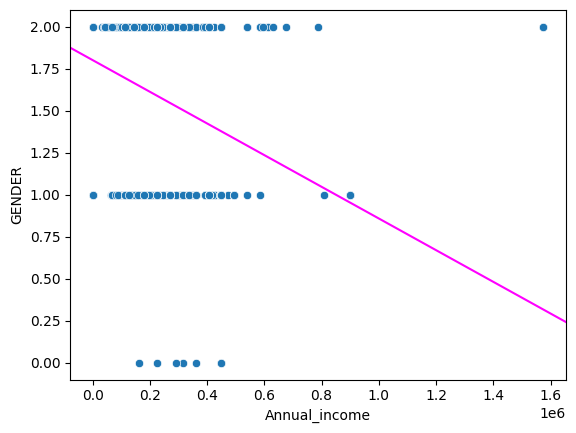

In [150]:
intercept, slope = gender_vs_income.params
sns.scatterplot(x = "Annual_income", y = "GENDER", data = df)
plt.axline(xy1 = (0,intercept), slope = slope, color = "magenta")

In [315]:
y = df["GENDER"]
X = df[["Propert_Owner", "Marital_status"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [316]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [317]:
y_pred = regression.predict(X_test)
y_pred

array([1.6631482 , 1.84922416, 1.63334778, 1.87902458, 1.735107  ,
       1.6631482 , 1.59118941, 1.87902458, 1.6631482 , 1.59118941,
       1.59118941, 1.59118941, 1.56138899, 1.59118941, 1.735107  ,
       1.59118941, 1.59118941, 1.59118941, 1.56138899, 1.59118941,
       1.735107  , 1.59118941, 1.59118941, 1.735107  , 1.6631482 ,
       1.59118941, 1.59118941, 1.59118941, 1.735107  , 1.59118941,
       1.80706579, 1.59118941, 1.56138899, 1.59118941, 1.59118941,
       1.56138899, 1.56138899, 1.56138899, 1.56138899, 1.56138899,
       1.59118941, 1.6631482 , 1.59118941, 1.56138899, 1.59118941,
       1.735107  , 1.59118941, 1.735107  , 1.59118941, 1.80706579,
       1.80706579, 1.56138899, 1.735107  , 1.59118941, 1.63334778,
       1.59118941, 1.59118941, 1.59118941, 1.59118941, 1.59118941,
       1.59118941, 1.56138899, 1.59118941, 1.56138899, 1.59118941,
       1.59118941, 1.56138899, 1.80706579, 1.70530658, 1.59118941,
       1.56138899, 1.63334778, 1.63334778, 1.59118941, 1.87902

In [318]:
arr2 = np.divide(y_pred, max(y_pred))
print(arr2)

[0.88511253 0.98414048 0.86925301 1.         0.92340835 0.88511253
 0.84681671 1.         0.88511253 0.84681671 0.84681671 0.84681671
 0.83095719 0.84681671 0.92340835 0.84681671 0.84681671 0.84681671
 0.83095719 0.84681671 0.92340835 0.84681671 0.84681671 0.92340835
 0.88511253 0.84681671 0.84681671 0.84681671 0.92340835 0.84681671
 0.96170418 0.84681671 0.83095719 0.84681671 0.84681671 0.83095719
 0.83095719 0.83095719 0.83095719 0.83095719 0.84681671 0.88511253
 0.84681671 0.83095719 0.84681671 0.92340835 0.84681671 0.92340835
 0.84681671 0.96170418 0.96170418 0.83095719 0.92340835 0.84681671
 0.86925301 0.84681671 0.84681671 0.84681671 0.84681671 0.84681671
 0.84681671 0.83095719 0.84681671 0.83095719 0.84681671 0.84681671
 0.83095719 0.96170418 0.90754884 0.84681671 0.83095719 0.86925301
 0.86925301 0.84681671 1.         0.84681671 0.84681671 0.83095719
 0.84681671 0.90754884 0.84681671 0.84681671 0.83095719 0.88511253
 0.88511253 0.88511253 0.83095719 0.84681671 0.84681671 0.8309

In [319]:
accuracy_score = regression.score(X_test, y_pred)
print(accuracy_score)

1.0


In [320]:
accuracy_score = regression.score(X_test, y_test)
print(accuracy_score)

0.013420232041637004


In [321]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.013420232041637004

Here with the Linear Regression we have a ever so slight positive correlation but it could be seen as no correlation at all. However because we can see the r^2 score is positive it can be concluded that the data is a good fit for the model

In [ ]:
df["Car_Owner"].value_counts()

Car_Owner
2    924
1    624
Name: count, dtype: int64

In [ ]:
df = pd.get_dummies(df[["GENDER", "Car_Owner", "Propert_Owner", "Marital_status", "Annual_income"]])
df

,GENDER,Car_Owner,Propert_Owner,Marital_status,Annual_income
0,1.0,1,1,1,180000.0
1,2.0,1,2,1,315000.0
2,2.0,1,2,1,315000.0
3,2.0,1,2,1,0.0
4,2.0,1,2,1,315000.0
...,...,...,...,...,...
1543,2.0,2,1,1,0.0
1544,2.0,2,2,2,225000.0
1545,1.0,1,1,1,180000.0
1546,1.0,1,2,3,270000.0


<Axes: >

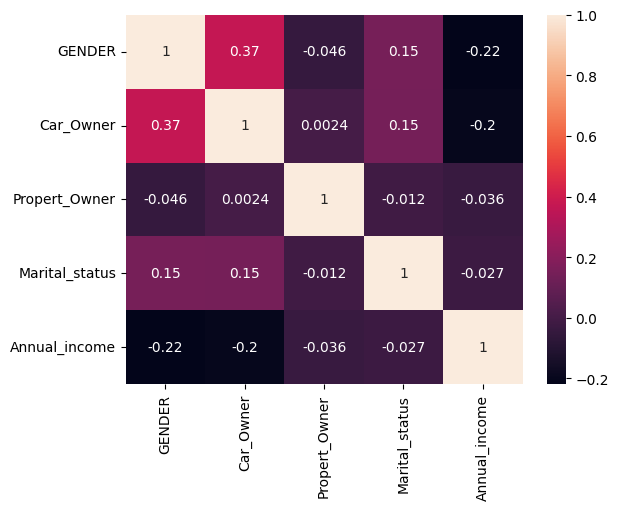

In [ ]:
correlation = df.corr()
sns.heatmap(correlation, annot = True)

In [306]:
y = df["GENDER"]
X = df[["Propert_Owner", "Marital_status"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [307]:
from sklearn.linear_model import LogisticRegression
regression = LogisticRegression()
regression.fit(X_train, y_train)

LogisticRegression()

In [308]:
y_pred = regression.predict(X_test)
y_pred

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2.

In [309]:
arr2 = np.divide(y_pred, max(y_pred))
print(arr2)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

In [310]:
accuracy_score = regression.score(X_test, y_pred)
print(accuracy_score)

1.0


In [311]:
accuracy_score = regression.score(X_test, y_test)
print(accuracy_score)

0.6193548387096774


In [312]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-0.6039318430278584

The r^2 has a negative correlation when using Logistic Regression compared to Linear Regression that has a slight positive correlation. Since the r^2 is negative we can conclude that the data is a poor fit for this model. As well we can see however; that unlike the Linear Regression the Logistic Regression has a higher accuracy.

In [313]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

df

,GENDER,Car_Owner,Propert_Owner,Marital_status,Annual_income
0,1.0,1,1,1,180000.0
1,2.0,1,2,1,315000.0
2,2.0,1,2,1,315000.0
3,2.0,1,2,1,0.0
4,2.0,1,2,1,315000.0
...,...,...,...,...,...
1543,2.0,2,1,1,0.0
1544,2.0,2,2,2,225000.0
1545,1.0,1,1,1,180000.0
1546,1.0,1,2,3,270000.0


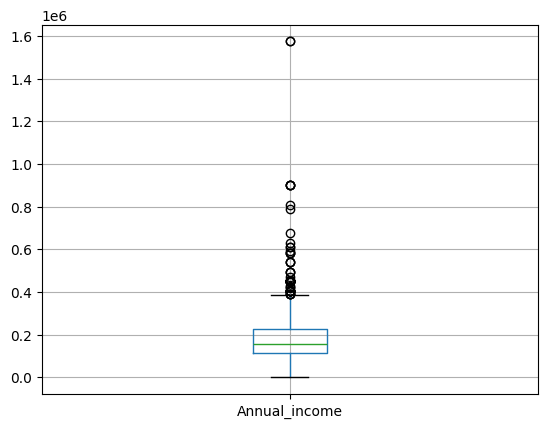

In [296]:
boxplot = df.boxplot(column = ["Annual_income"], return_type="axes")


In [297]:
x = df.drop("Annual_income", axis = 1)
Y = df["Annual_income"]

x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.3, random_state=42)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train) 
x_test = sc.fit_transform(x_test)

knn = KNeighborsRegressor(n_neighbors=13) 
knn.fit(x_train, Y_train) 
y_pred = knn.predict(x_test)
print(y_pred)
print(type(y_pred))

[153346.15384615 136038.46153846 156115.38461538 149884.61538462
 137076.92307692 204576.92307692 145938.46153846 149884.61538462
 153346.15384615 232615.38461538 145938.46153846 125451.69230769
 151961.53846154 232615.38461538 141057.69230769 145938.46153846
 125451.69230769 125451.69230769 237115.38461538 145938.46153846
 182769.23076923 145938.46153846 160269.23076923 182769.23076923
 235730.76923077 125451.69230769 125451.69230769 125451.69230769
 137076.92307692 125451.69230769 203953.84615385 125451.69230769
 237115.38461538 125451.69230769 145938.46153846 221884.61538462
 151961.53846154 151961.53846154 151961.53846154 221884.61538462
 125451.69230769 153346.15384615 125451.69230769 237115.38461538
 125451.69230769 182769.23076923 125451.69230769 292673.07692308
 125451.69230769 191423.07692308 195923.07692308 151961.53846154
 182769.23076923 145938.46153846 222923.07692308 125451.69230769
 145938.46153846 125451.69230769 145938.46153846 125451.69230769
 125451.69230769 221884.6

In [298]:
print(knn.score(x_test, Y_test))

0.0864044919050635


In [299]:
accuracy_score = knn.score(x_test, Y_test)
print(accuracy_score)

0.0864044919050635


In [300]:
y_pred_list = y_pred.tolist()
y_pred_list

[153346.15384615384,
 136038.46153846153,
 156115.38461538462,
 149884.61538461538,
 137076.92307692306,
 204576.92307692306,
 145938.46153846153,
 149884.61538461538,
 153346.15384615384,
 232615.38461538462,
 145938.46153846153,
 125451.69230769231,
 151961.53846153847,
 232615.38461538462,
 141057.6923076923,
 145938.46153846153,
 125451.69230769231,
 125451.69230769231,
 237115.38461538462,
 145938.46153846153,
 182769.23076923078,
 145938.46153846153,
 160269.23076923078,
 182769.23076923078,
 235730.76923076922,
 125451.69230769231,
 125451.69230769231,
 125451.69230769231,
 137076.92307692306,
 125451.69230769231,
 203953.84615384616,
 125451.69230769231,
 237115.38461538462,
 125451.69230769231,
 145938.46153846153,
 221884.61538461538,
 151961.53846153847,
 151961.53846153847,
 151961.53846153847,
 221884.61538461538,
 125451.69230769231,
 153346.15384615384,
 125451.69230769231,
 237115.38461538462,
 125451.69230769231,
 182769.23076923078,
 125451.69230769231,
 292673.076923

In [301]:
starting = []
optimal_k = 0
def k_value():
    for i in range(len(y_pred_list)):
        if y_pred_list[i] > optimal_k:
            y_pred_list[i] += 1
        elif y_pred_list[i] < optimal_k:
            y_pred_list[i] = optimal_k
            y_pred_list[i] += 1
    high_opp_k = max(y_pred_list)
    exit
print(high_opp_k)




335082.92307692306


What I did to normalize the data set is to divide every single index but the max number in the data set. Which is one of the many ways to normalize a numerical dataset. After doing so I ran an accuracy_score for both the Logistic Regression and Linear Regression and what I have found is that both accuracy where different before normalization and afterwards they produced the same accuracy score of 1.0